## Wrangle

**Acquire**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_r = pd.read_csv('https://query.data.world/s/fgwezltmmhwzdq6frrv7pf6jrl6vps?dws=00000')
df_w = pd.read_csv('https://query.data.world/s/otk67utgv5232zzz3ooavdfwpcj2vz?dws=00000')

In [16]:
df_r['red'] = 1
df_w['red'] = 0
df = pd.concat([df_r, df_w], axis=0)
print(len(df_r), len(df_w), len(df))
df.head()

1599 4898 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Save Raw Data

## Preparation

- Inspect raw data and note any desired transformations which may include any of the following:
    - [x] Drop unnecessary columns (duplicate, redundant columns)
    - [x] Handle missing values and impute appropriate values
    - [x] check for explicit missing values (e.g. np.nan)
    - [x] check for implicit missing values (e.g. whitespace, 'unknown', etc.)
    - [x] Deal with any duplicate rows/wines/etc. (with same info, id's, etc.).
    - [x] Numeric columns should be numeric data types
    
    
- Inspect clean data
- Ensure data is tidy:
    - [x] one value per cell
    - [x] each observation is one and only one row
    - [x] each feature is one and only one column

**Check dtypes**

In [17]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red                       int64
dtype: object

**Handle Duplicate Columns**
- None

**Handle Duplicate Rows**

In [18]:
df.duplicated().sum()

1177

Percent of rows that are duplicates:

In [19]:
df.duplicated().sum()/len(df)

0.18116053563183007

In [20]:
df = df.drop_duplicates()

**Check Explicit Missing Values**
- None

In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
dtype: int64

**Check implicit Missing Values**
-  No blank spaces since our dtypes are numeric

Check For Outliers
- minor outliers. For MVP, we'll keep.

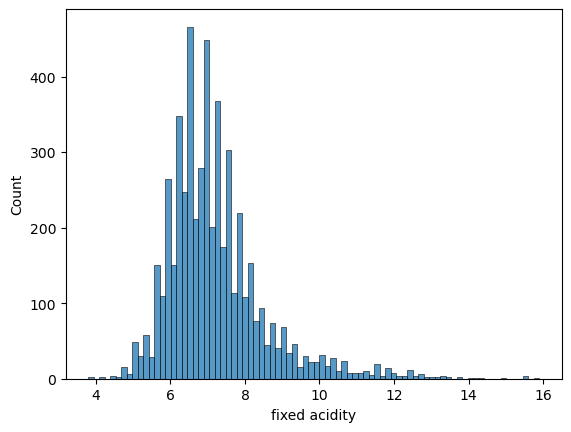

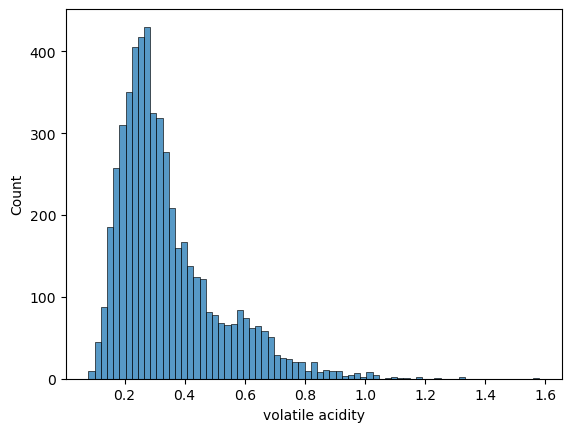

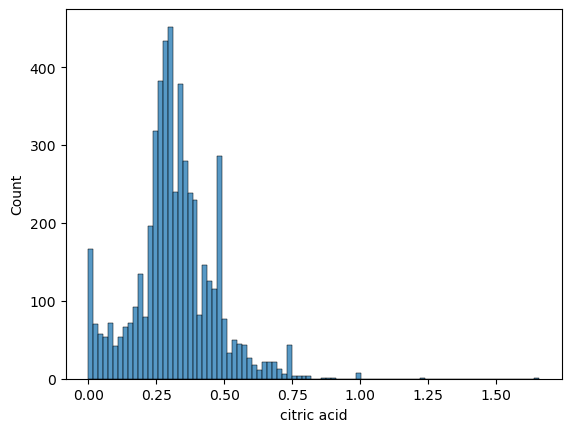

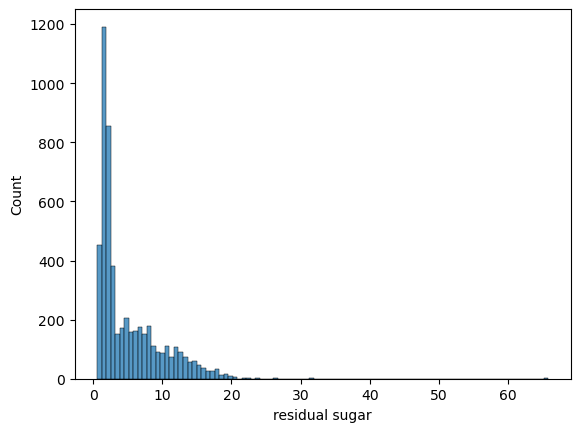

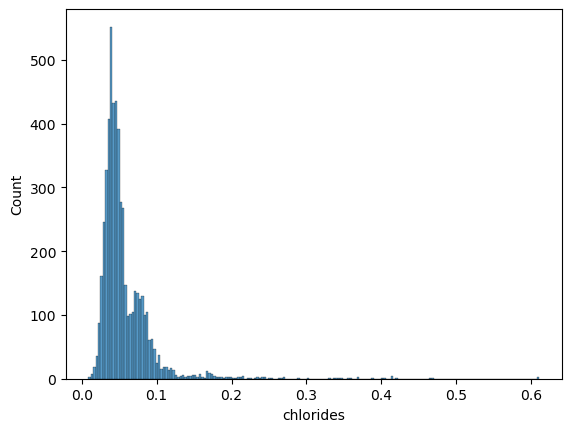

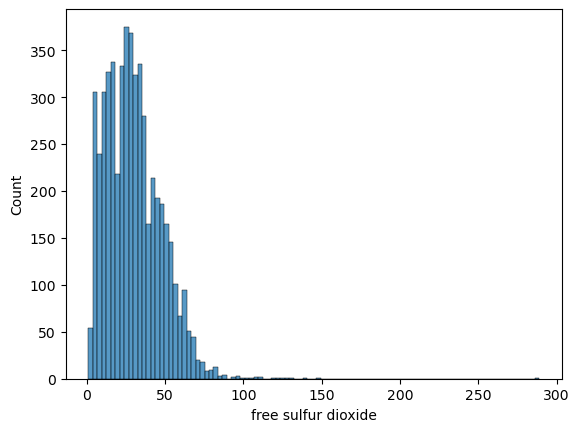

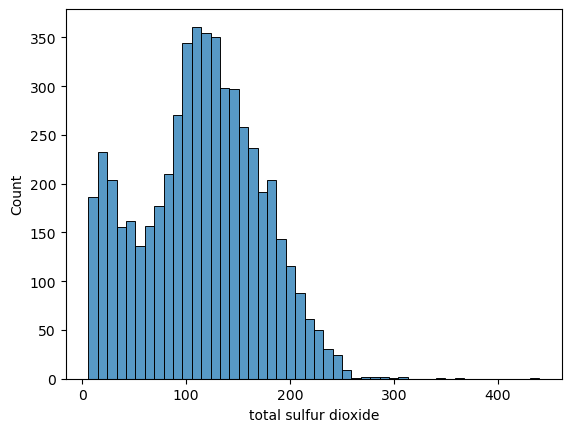

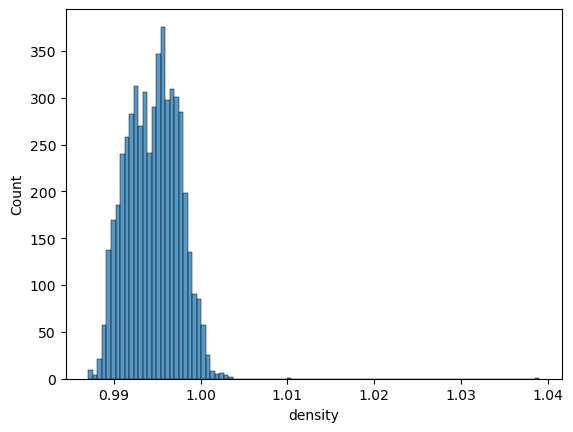

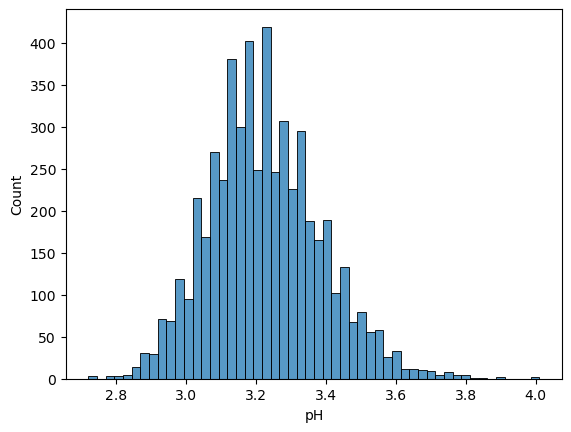

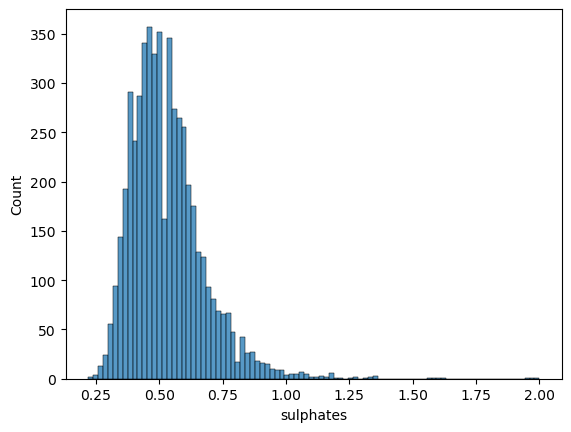

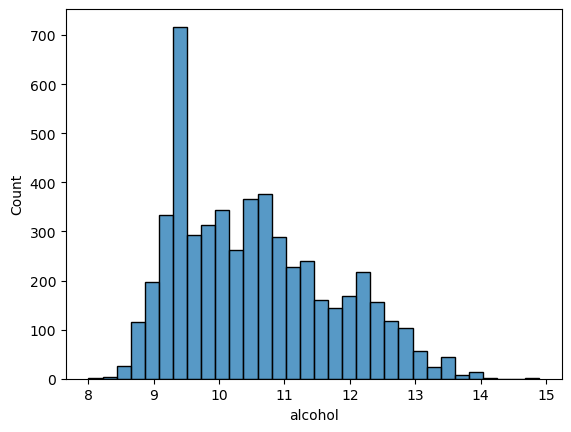

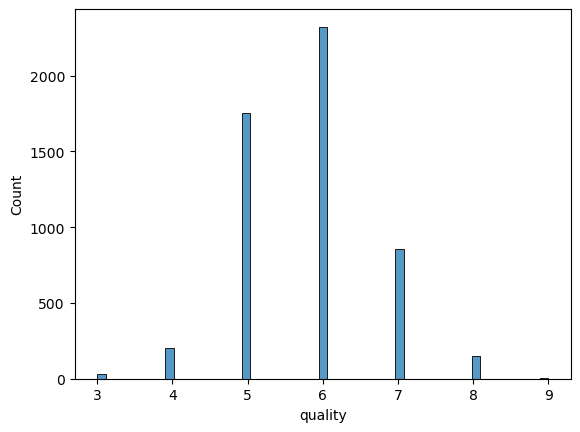

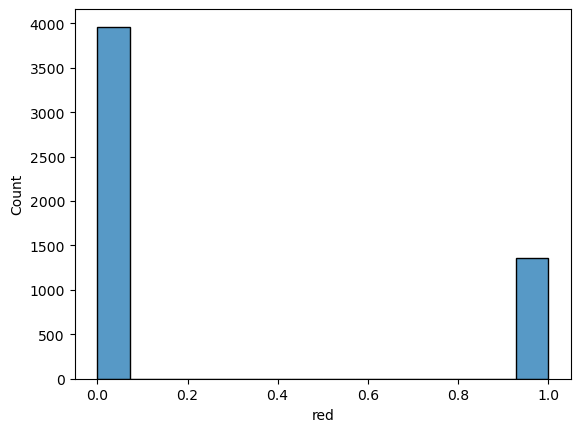

In [22]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [23]:
def wrangle():
    
    # acquire
    df_r = pd.read_csv('https://query.data.world/s/fgwezltmmhwzdq6frrv7pf6jrl6vps?dws=00000')
    df_w = pd.read_csv('https://query.data.world/s/otk67utgv5232zzz3ooavdfwpcj2vz?dws=00000')
    
    # add color feature and 
    df_r['red'] = 1
    df_w['red'] = 0
    df = pd.concat([df_r, df_w], axis=0)
    
    # drop duplicates
    df = df.drop_duplicates()
    
    return df

In [24]:
wrangle().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [25]:
from sklearn.model_selection import train_test_split
def split_data(df, test_size=.15, validate_size=.15, stratify_col=None, random_state=None):
    '''
    take in a DataFrame and return train, validate, and test DataFrames;
    return train, validate, test DataFrames.
    '''
    # no stratification
    if stratify_col == None:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size, random_state=random_state)
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size/(1-test_size),
                                                                           random_state=random_state)
    # stratify split
    else:
        # split test data
        train_validate, test = train_test_split(df, test_size=test_size,
                                                random_state=random_state, stratify=df[stratify_col])
        # split validate data
        train, validate = train_test_split(train_validate, test_size=validate_size/(1-test_size),
                                           random_state=random_state, stratify=train_validate[stratify_col])       
    return train, validate, test
